In [27]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/tcr_embedder')
os.chdir('/home/yutanagano/Projects/tcr_embedder')

In [28]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')

In [29]:
BENCHMARKING_PARENT_DIR = Path('benchmarks')

In [30]:
metric_dicts = []

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

In [31]:
metrics = pd.DataFrame(metric_dicts)
metrics['model_name'] = metrics['model_name'].map(lambda x: 'random_embedder' if 'random_embedder' in x else x)
metrics = metrics.sort_values(by='model_name', ignore_index=True)

In [32]:
metrics

,model_name,alignment,uniformity
0,atchley_embedder,0.880457,-1.691871
1,random_embedder,1.106915,-2.192567
2,random_embedder,0.648963,-1.496908
3,random_embedder,1.090223,-2.022780
4,random_embedder,0.638965,-1.296466
5,random_embedder,0.532533,-1.148620
6,random_embedder,0.581461,-1.358597
7,random_embedder,0.779544,-1.700451
8,random_embedder,0.836832,-1.654058
9,random_embedder,0.424248,-1.023224


<AxesSubplot: xlabel='uniformity', ylabel='alignment'>

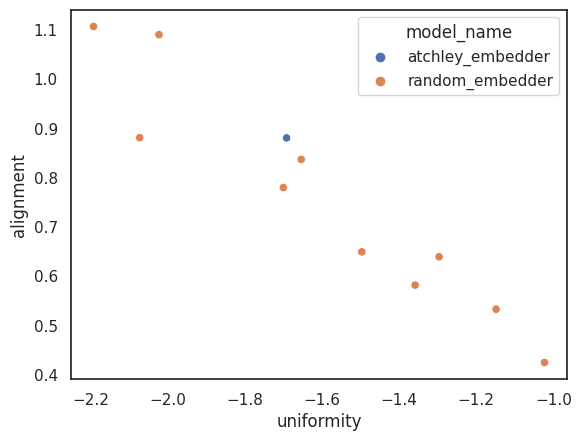

In [33]:
seaborn.scatterplot(metrics, x='uniformity', y='alignment', hue='model_name')